In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
f= open("C:\Users\student12\Desktop\Santander/train_ver2.csv",'r')
g = open("C:\Users\student12\Desktop\Santander/one_month.csv", 'w')

for line in f:
    date = line[:10]
    if date == '2016-05-28':  #january month will be used
        g.write(line)

In [11]:
with open("C:\Users\student12\Desktop\Santander/train_ver2.csv", 'r') as f:
    cols = f.readline().split(',')

In [12]:
cols = [s.replace('"','') for s in cols]

In [18]:
df = pd.read_csv("C:\Users\student12\Desktop\Santander/one_month.csv", dtype={'indrel_1mes': str, 'conyuemp': str}, names=cols)

In [24]:
df_features = df.iloc[:,:24]

In [25]:
df_features.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-05-28,657640,N,ES,H,68,2006-11-17,0,114,1,...,N,NaN,KAQ,N,1,28.0,MADRID,0,147347.97,02 - PARTICULARES
1,2016-05-28,657788,N,ES,H,42,2006-11-18,0,114,1,...,N,NaN,KBF,N,1,28.0,MADRID,1,132559.35,02 - PARTICULARES
2,2016-05-28,657795,N,ES,V,44,2006-11-18,0,114,1,...,N,NaN,KAP,N,1,26.0,"RIOJA, LA",1,81399.57,02 - PARTICULARES
3,2016-05-28,657790,N,ES,V,42,2006-11-18,0,114,1,...,N,NaN,KBF,N,1,48.0,BIZKAIA,1,NaN,02 - PARTICULARES
4,2016-05-28,657794,N,ES,H,49,2006-11-18,0,114,1,...,N,NaN,KAT,N,1,8.0,BARCELONA,1,102189.00,01 - TOP


In [28]:
del df_features['fecha_dato']
del df_features['ncodpers']
del df_features['tipodom']

In [29]:
(df_features.isnull().sum()/len(df_features)).sort_values() #propotion of null values/actual values for each column

ind_empleado             0.000000
pais_residencia          0.000000
age                      0.000000
fecha_alta               0.000000
ind_nuevo                0.000000
antiguedad               0.000000
indrel                   0.000000
ind_actividad_cliente    0.000000
indresi                  0.000000
indext                   0.000000
indfall                  0.000000
sexo                     0.000005
nomprov                  0.004286
cod_prov                 0.004286
tiprel_1mes              0.004305
indrel_1mes              0.004305
canal_entrada            0.007192
segmento                 0.007542
renta                    0.245872
ult_fec_cli_1t           0.997992
conyuemp                 0.999878
dtype: float64

In [30]:
del df_features['ult_fec_cli_1t']
del df_features['conyuemp']

In [50]:
from sklearn import preprocessing

for f in df_features.columns:
    if df_features[f].dtype == 'object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df_features[f].values))
        df_features[f] = lbl.transform(list(df_features[f].values))

ind_empleado
pais_residencia
sexo
fecha_alta
indrel_1mes
tiprel_1mes
indresi
indext
canal_entrada
indfall
nomprov
segmento


In [57]:
df_features.corr()['renta'].sort_values()

fecha_alta              -0.088515
canal_entrada           -0.069011
segmento                -0.067104
tiprel_1mes             -0.031382
ind_nuevo               -0.017038
cod_prov                -0.014583
indext                  -0.007779
nomprov                 -0.005863
ind_empleado            -0.005321
pais_residencia         -0.002048
indrel                  -0.000657
antiguedad               0.002947
indresi                  0.005516
indrel_1mes              0.006534
indfall                  0.008578
sexo                     0.009226
ind_actividad_cliente    0.028481
age                      0.072239
renta                    1.000000
Name: renta, dtype: float64

In [52]:
median_renta = np.zeros((2,4))
for i in range(2):
    for j in range (4):
        median_renta[i][j] = df_features[(df_features['ind_actividad_cliente'] == i) & \
                                         (df_features['segmento'] == j)]['renta'].dropna().median()

In [53]:
median_renta

array([[ 132589.44 ,  103812.39 ,   88228.89 ,  127941.93 ],
       [ 141126.48 ,  110529.975,   91964.85 ,   97828.77 ]])

In [54]:
for i in range(0, 2):
    for j in range(0, 4):
        df_features.loc[(df_features['renta'].isnull()) & \
                        (df_features['ind_actividad_cliente'] == i) & \
                        (df_features['segmento'] == j), 'renta'] = median_renta[i][j]

In [55]:
(df_features.isnull().sum()/len(df_features)).sort_values()

ind_empleado             0.000000
ind_actividad_cliente    0.000000
nomprov                  0.000000
indfall                  0.000000
canal_entrada            0.000000
indext                   0.000000
indresi                  0.000000
renta                    0.000000
tiprel_1mes              0.000000
indrel                   0.000000
antiguedad               0.000000
ind_nuevo                0.000000
fecha_alta               0.000000
age                      0.000000
sexo                     0.000000
pais_residencia          0.000000
indrel_1mes              0.000000
segmento                 0.000000
cod_prov                 0.004286
dtype: float64

In [58]:
df_features['cod_prov'] = df_features['cod_prov'].fillna(df_features['cod_prov'].median())

In [59]:
(df_features.isnull().sum()/len(df_features)).sort_values()


ind_empleado             0.0
ind_actividad_cliente    0.0
nomprov                  0.0
cod_prov                 0.0
indfall                  0.0
canal_entrada            0.0
indext                   0.0
indresi                  0.0
renta                    0.0
tiprel_1mes              0.0
indrel                   0.0
antiguedad               0.0
ind_nuevo                0.0
fecha_alta               0.0
age                      0.0
sexo                     0.0
pais_residencia          0.0
indrel_1mes              0.0
segmento                 0.0
dtype: float64

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import operator

In [61]:
X = df_features.values
test = SelectKBest(score_func=f_regression)
prod_cols = list(df.columns[24:48])

In [62]:
d = {}
for p in prod_cols:  #loops through the product columns
    y = np.array(df[p]) #makes an array for each product, which is customers:0 and 1s, if the customer has the product
    fit = test.fit(X, y) #wizardy (the function just works under the hood)
    l = zip(df_features.columns, np.around(fit.scores_)) #creates a tuple of product: feature importance (features that affect products the most)
    d[p] = sorted(l, key=lambda x: x[1], reverse=True) #sorts the feature wieghting (l) for each product (p)

In [78]:
df_ranking = pd.DataFrame(index=df_features.columns,columns=prod_cols)

In [79]:
df_ranking.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ind_empleado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pais_residencia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sexo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fecha_alta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
for p in prod_cols:
    i = 0
    for r in d[p]:
        df_ranking[p][r[0]] = i
        i += 1

In [103]:
df_ranking['total'] = df_ranking.sum(axis=1)

In [104]:
df_ranking.sort_values('total')

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,total
ind_actividad_cliente,3,2,0,2,0,1,1,4,2,1,...,2,3,0,0,0,3,0,0,0,29.0
segmento,2,1,1,3,2,3,2,3,0,0,...,1,4,3,3,2,2,2,2,2,44.0
tiprel_1mes,4,3,4,0,1,2,3,5,4,2,...,3,1,1,1,3,4,1,1,1,55.0
fecha_alta,0,4,5,1,4,6,4,0,1,3,...,0,2,2,2,1,0,3,3,4,59.0
canal_entrada,1,7,3,5,3,4,14,2,3,4,...,4,0,4,4,4,1,4,4,3,93.0
age,5,10,2,4,5,0,5,1,5,5,...,5,6,5,5,5,5,5,5,5,108.0
sexo,7,8,8,6,6,12,6,7,7,13,...,9,7,6,7,6,9,7,7,6,184.0
ind_nuevo,9,11,7,8,12,10,0,6,6,6,...,8,9,8,8,9,6,15,15,18,212.0
ind_empleado,6,0,17,7,7,15,13,17,9,7,...,6,8,9,6,7,8,6,6,7,213.0
renta,8,13,11,10,8,8,12,8,8,9,...,7,13,7,9,8,7,8,8,9,216.0


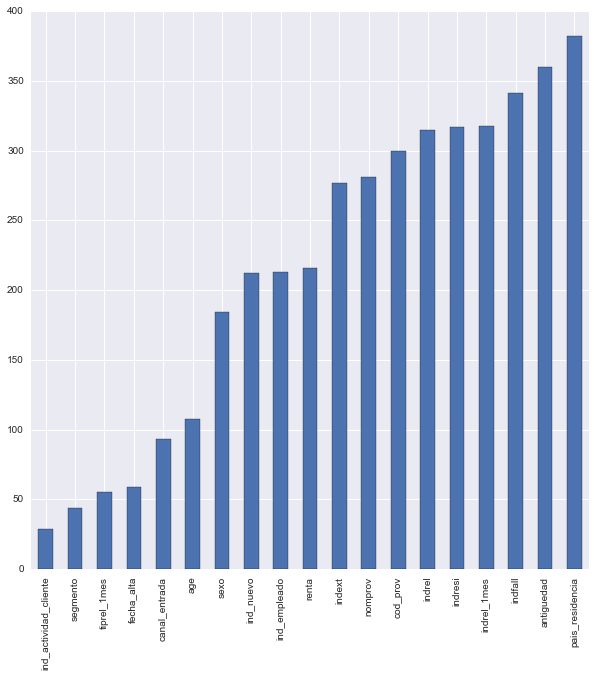

In [105]:
df_ranking.sort_values('total')['total'].plot(kind='bar')

In [106]:
df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-05-28,657640,N,ES,H,68,2006-11-17,0,114,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-05-28,657788,N,ES,H,42,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-05-28,657795,N,ES,V,44,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-05-28,657790,N,ES,V,42,2006-11-18,0,114,1,...,0,0,0,0,1,0,0,1,1,1
4,2016-05-28,657794,N,ES,H,49,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
5,2016-05-28,657797,N,ES,H,32,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
6,2016-05-28,657789,N,ES,V,36,2006-11-18,0,91,1,...,0,0,0,0,1,0,0,0,0,0
7,2016-05-28,657787,N,ES,V,41,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
8,2016-05-28,657777,N,ES,V,45,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
9,2016-05-28,657782,N,ES,V,31,2006-11-18,0,114,1,...,0,0,0,0,0,0,0,0,0,0
